# Analysis of Mean Weekly Time Spent on Cell Phones by Male and Female College Students at Midwestern University

## I. Overview

This study was conducted to compare the mean time spent on cell phones per week by male and female college students at Midwestern University. Fifty male and fifty female students from Midwestern University were randomly selected, and the time spent on cell phones was recorded. The study aims to determine whether there is a significant difference in the mean time spent on cell phones between these two groups.

### Guide Questions:

<ol>
    <li>Formulate and present the rationale for a hypothesis test that the researcher could use to compare the mean time spent on cell phones by male and female college students per week.</li>
    <li>Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for the researcher?</li>
    <li>Provide descriptive statistical summaries of the data for each gender category.</li>
    <li>What is the 95% confidence interval for the population mean of each gender category, and what is the 95% confidence interval for the difference between the means of the two populations?</li>
    <li>Do you see a need for larger sample sizes and more testing with the time spent on cell phones? Discuss.</li>
    <li>Make a report including the testing of the assumptions for two independent samples t-test.</li>
</ol>

### The Dataset

In [50]:
males = [12,7,7,10,8,10,11,9,9,13,4,9,12,11,9,9,7,12,10,13,11,10,6,12,11,9,10,12,8,9,13,10,9,7,10,7,10,8,11,10,11,7,15,8,9,9,11,13,10,13]
females = [11,10,11,10,11,12,12,10,9,9,9,10,8,7,12,9,7,8,9,8,7,7,9,9,12,10,9,13,9,9,10,9,6,12,8,11,8,8,11,12,9,10,11,14,12,7,11,10,9,11]

The data shows an equal pairing of 50 male and 50 female university students, along with their weekly mean cell phone times.

For this report, the following modules will be relevant:

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ptitprince as pt
from scipy import stats
from IPython.display import display, HTML

## II. Formulation of Hypotheses

The goal is to test whether there is a significant difference in the mean time spent on cell phones between male and female college students. The null hypothesis ($H_0$) assumes that the means for both groups are equal, while the alternative hypothesis ($H_1$) assumes that the means are not equal.

$H_0 : \mu_1 = \mu_2$ (There is no difference in the mean time spent on cell phones between males and females.)

$H_1 : \mu_1 \neq \mu_2$ (There is a difference in the mean time spent on cell phones between males and females.)

An independent samples t-test will be used to compare the means of two independent groups (males and females), assuming the six prerequisite assumptions are met.

## III. Descriptive Statistics

### Males

In [45]:


df_m = pd.DataFrame(males)

count_m = df_m.count().to_frame(name="Valid").transpose()

central_tends_m = df_m.agg(['median', 'mean', 'std', 'var', 'skew'])
central_tends_m.rename(index={'median': 'Median', 'mean': 'Mean', 'std': 'Std. Deviation', 'var': 'Variance', 'skew': 'Skewness'}, inplace=True)

mode_pre_m = pd.Series(males).mode().tolist()
mode_d_m = {'Mode ᵃ': mode_pre_m}
mode_df_m = pd.DataFrame(mode_d_m)
mode_m = mode_df_m.transpose()[0].to_frame()

def skew_sde(x):
    n = len(x)
    return np.sqrt(6 * n * (n-1) / ((n-2) * (n+1) * (n+3)))
error_skew_m = df_m.apply(skew_sde).to_frame(name="Std. Error of Skewness").transpose()

kurtosis_m = df_m.kurtosis().to_frame(name="Kurtosis").transpose()

def kurt_sde(x):
    n = len(x)
    return np.sqrt(24 * n * (n-1)**2 / ((n-3) * (n-2) * (n+3) * (n+5)))
error_kurt_m = df_m.apply(kurt_sde).to_frame(name="Std. Error of Kurtosis").transpose()

extremes_m = df_m.agg(['min', 'max'])
extremes_m = extremes_m.rename(index={'min': 'Minimum', 'max': 'Maximum'})
percentiles_m = df_m.quantile([0.25, 0.50, 0.75, 0.90, 0.95])
percentiles_m = percentiles_m.rename(index={0.25: '25th percentile', 0.50: '50th percentile', 0.75: '75th percentile', 0.90: '90th percentile', 0.95: '95th percentile'})

final_table_m = pd.concat([count_m, mode_m, central_tends_m, error_skew_m, kurtosis_m, error_kurt_m, extremes_m, percentiles_m])
final_table_m = final_table_m.rename(columns={0: 'Score'})
description = pd.DataFrame(data={'Score': ['ᵃ More than one mode exists, only the first is reported']}, index=[''])
final_table_m = pd.concat([final_table_m, description])
final_table_m.loc['Valid', 'Score'] = int(final_table_m.loc['Valid', 'Score'])

def format_values(x):
    if isinstance(x, float):
        return f'{x:.3f}'
    return x

final_table_m['Score'] = final_table_m['Score'].apply(format_values)
final_table_m = final_table_m.style.set_table_styles({
    ('', ''): [{'selector': 'td', 'props': 'border-top: 3px solid black;'}]
}, overwrite=False, axis=1)

title_html = '<h4 style="text-align: left;">Descriptive Statistics for Males</h2>'
display(HTML(title_html))
display(final_table_m)

,Score
Valid,50
Mode ᵃ,9.000
Median,10.000
Mean,9.820
Std. Deviation,2.154
Variance,4.640
Skewness,-0.115
Std. Error of Skewness,0.337
Kurtosis,0.177
Std. Error of Kurtosis,0.662


### Females

In [46]:
df_f = pd.DataFrame(females)

count_f = df_f.count().to_frame(name="Valid").transpose()

central_tends_f = df_f.agg(['median', 'mean', 'std', 'var', 'skew'])
central_tends_f.rename(index={'median': 'Median', 'mean': 'Mean', 'std': 'Std. Deviation', 'var': 'Variance', 'skew': 'Skewness'}, inplace=True)

mode_pre_f = pd.Series(females).mode().tolist()
mode_d_f = {'Mode': mode_pre_f}
mode_df_f = pd.DataFrame(mode_d_f)
mode_f = mode_df_f.transpose()[0].to_frame()

error_skew_f = df_f.apply(skew_sde).to_frame(name="Std. Error of Skewness").transpose()
kurtosis_f = df_f.kurtosis().to_frame(name="Kurtosis").transpose()
error_kurt_f = df_f.apply(kurt_sde).to_frame(name="Std. Error of Kurtosis").transpose()

extremes_f = df_f.agg(['min', 'max'])
extremes_f = extremes_f.rename(index={'min': 'Minimum', 'max': 'Maximum'})
percentiles_f = df_f.quantile([0.25, 0.50, 0.75, 0.90, 0.95])
percentiles_f = percentiles_f.rename(index={0.25: '25th percentile', 0.50: '50th percentile', 0.75: '75th percentile', 0.90: '90th percentile', 0.95: '95th percentile'})

final_table_f = pd.concat([count_f, mode_f, central_tends_f, error_skew_f, kurtosis_f, error_kurt_f, extremes_f, percentiles_f])
final_table_f = final_table_f.rename(columns={0: 'Score'})
final_table_f.loc['Valid', 'Score'] = int(final_table_f.loc['Valid', 'Score'])

final_table_f['Score'] = final_table_f['Score'].apply(format_values)
final_table_f = final_table_f.style.set_table_styles({
    ('', ''): [{'selector': 'td', 'props': 'border-top: 3px solid black;'}]
}, overwrite=False, axis=1)

title_html = '<h4 style="text-align: left;">Descriptive Statistics for Females</h2>'
display(HTML(title_html))
display(final_table_f)

,Score
Valid,50.000
Mode,9.000
Median,9.500
Mean,9.700
Std. Deviation,1.776
Variance,3.153
Skewness,0.134
Std. Error of Skewness,0.337
Kurtosis,-0.442
Std. Error of Kurtosis,0.662


## IV. Checking Assumptions

### Assumption 1: There is one dependent variable that is measured at the continuous level.

The dependent variable is the number of hours spent on cell phones, which is measured in a continuous scale. This assumption is met.

### Assumption 2: There is one independent variable that consists of two categorical, independent groups.

The independent variable is sex (male and female), which is a dichotomous variable with two independent groups. This assumption is met.

### Assumption 3: The data should have independence of observations, meaning that there is no relationship between the observations in each group of the independent variable or between the groups themselves.

There is no participant that is both male and female in this dataset. This means that each participant is present to only one group, therefore Assumption 3 is met.

### Assumption 4: There should be no significant outliers in the two groups of the independent variable in terms of the dependent variable.

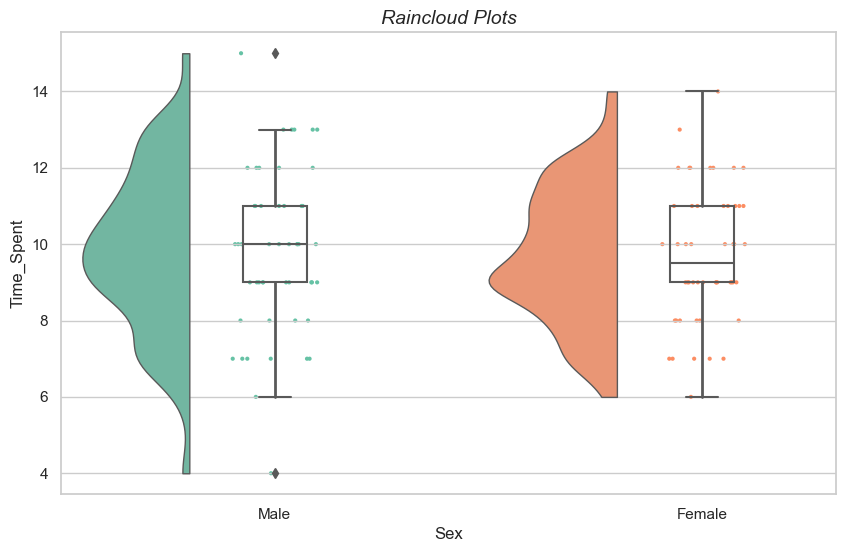

In [54]:
df_combined = pd.DataFrame({
    'Time_Spent': males + females,
    'Sex': ['Male'] * len(males) + ['Female'] * len(females)
})

plt.figure(figsize=(10, 6))
raincloud = pt.RainCloud(x='Sex', y='Time_Spent', data=df_combined, palette='Set2', 
                          bw=0.3, width_viol=0.6, ax=None)

plt.title('Raincloud Plots', fontsize=14, style='italic')
plt.show()

By visual inspection, it can be observed that there are two outliers in the Male group (4 & 15). However, we can still run the independent samples t-test since the distribution is normal and the variances are homogeneous, as shown later.

### Assumption 5: The dependent variable should be approximately normally distributed within each group of the independent variable.

In [44]:
from scipy import stats

stat_males, p_males = stats.shapiro(males)
stat_females, p_females = stats.shapiro(females)

shapiro_df = pd.DataFrame({
    'Sex': ['Males', 'Females'],
    'W': [stat_males, stat_females],
    'p': [p_males, p_females]
})

display(shapiro_df.style.hide(axis="index"))

Sex,W,p
Males,0.974654,0.353992
Females,0.963877,0.129197


Since both p-values are greater than 0.05, the assumption of normality is met for both groups.

### Assumption 6: There should be an equality of variances between the groups with and without the Cloak on their number of Mischief. If p > 0.05, then this hypothesis is met.

In [42]:
stat_levene, p_levene = stats.levene(males, females)

levene_df = pd.DataFrame({
    'F': [stat_levene],
    'df': [1],
    'p': [p_levene]
})

levene_df['F'] = levene_df['F'].round(3)
levene_df['p'] = levene_df['p'].round(3)

display(levene_df.style.hide(axis="index"))

F,df,p
0.694000,1,0.407000


The p-value for Levene's test is greater than 0.05, indicating that the assumption of equal variances is met.

## V. Sample Size

Given the results—normal distribution, equal variances, and close means between the male and female groups—there seems to be little justification for increasing the sample size or conducting additional tests. The fact that the means are nearly identical indicates that the differences between the two groups are minimal. A larger sample size is unlikely to change this conclusion, as the current data already suggests that any difference between the groups is small or non-existent.

Low variability within the groups means that the data points are relatively consistent, leading to a high level of precision in the current estimates. This precision suggests that further data collection would likely yield similar results. Increasing the sample size in such a context might slightly reduce uncertainty, but the effect is unlikely to become significant or meaningful based on the current trends. The high p-value (0.76) indicates that there is very little evidence to reject the null hypothesis. Even with a larger sample, this is unlikely to change significantly, as the data already points to the absence of a meaningful effect. Furthermore, since the study takes place inside a university setting, then the population is more likely to have more homogeneous demographics.

Additionally, while increasing the sample size could theoretically result in statistical significance (especially for very small effects), it’s important to consider practical relevance. Given the close means, even if a larger sample revealed a statistically significant result, the effect size would still likely be trivial, offering little real-world importance. In behavioral studies like this one, practical significance is often more important than statistical significance, and based on the current evidence, the observed difference between the groups appears to be negligible. Therefore, further testing or a larger sample size is not warranted.

## VI. Independent Samples T-Test

The data has met most of the six assumptions, proven that the outliers do not significantly impact the results, and shown that the sample size is adequate in the study's context. Hence, an independent samples t-test can be conducted to compare the means of the two groups.

### 95% Confidence Intervals

In [48]:
males_mean = np.mean(males)
females_mean = np.mean(females)

ci_males = stats.t.interval(0.95, len(males)-1, loc=males_mean, scale=stats.sem(males))
ci_females = stats.t.interval(0.95, len(females)-1, loc=females_mean, scale=stats.sem(females))

alpha = 0.05
critical_value = stats.t.ppf(1 - alpha/2, df)
margin_of_error = critical_value * se_diff
ci_lower = (diff_mean - margin_of_error)
ci_upper = (diff_mean + margin_of_error)

diff_mean = males_mean - females_mean
se_diff = np.sqrt((np.var(males, ddof=1) / n1) + (np.var(females, ddof=1) / n2))
ci_diff = (ci_lower, ci_upper)

ci_data = {
    'Group': ['Males', 'Females', 'Difference (Males - Females)'],
    'Lower Bound (95% CI)': [ci_males[0], ci_females[0], ci_diff[0]],
    'Upper Bound (95% CI)': [ci_males[1], ci_females[1], ci_diff[1]]
}

df_ci = pd.DataFrame(ci_data)
display(df_ci.style.hide(axis="index"))

Group,Lower Bound (95% CI),Upper Bound (95% CI)
Males,9.207794,10.432206
Females,9.195356,10.204644
Difference (Males - Females),-0.663474,0.903474


Notice that the interval for the difference in means include 0. This will be important for interpreting the results of the t-test later.

### P-Value & Test Proper

In [51]:
n1 = len(males)
n2 = len(females)
df = n1 + n2 - 2

t_statistic, p_value = stats.ttest_ind(males, females)

results_df = pd.DataFrame({
    't': [t_statistic],
    'df': [df],
    'p': [p_value],
    'Mean Difference': [diff_mean],
    'SE Difference': [se_diff],
    '95% CI for Mean Difference (Lower; Upper)': [f'({ci_lower:.4f}; {ci_upper:.4f})']
})

display(results_df.style.hide(axis="index"))

t,df,p,Mean Difference,SE Difference,95% CI for Mean Difference (Lower; Upper)
0.303949,98,0.761811,0.120000,0.394803,(-0.6635; 0.9035)


The independent samples t-test yields a p-value of 0.76, which is greater than the significance level of 0.05. Therefore, **we fail to reject the null hypothesis**. This suggests that there is no statistically significant difference in the mean time spent on cell phones between male and female students. Additionally, since the confidence interval for the difference in means includes 0, this brings more support and foundation to our conclusion.

## VII. Discussion and Recommendations

This study aimed to compare the mean time spent on cell phones by male and female college students from Midwestern University, potentially discovering behavioral patterns that may have implications for understanding communication trends among young adults. The analysis utilized a balanced sample of 50 male and 50 female students from a university characterized by relatively homogenized demographics (e.g. similar ages, similar regions, etc.), which enhances the generalizability of the findings to the broader student population.

The preliminary analysis & assumption checking identified the presence of outliers in the male dataset, specifically the values 4 and 15. Although these outliers raised concerns regarding their potential impact on the results, the Shapiro-Wilk normality and Levene homogeneity tests confirmed that the assumptions required for the independent samples t-test were still satisfied. Consequently, this allowed for valid conclusions regarding the mean time spent on cell phones between genders.

The results of the independent samples t-test indicated no significant difference in the mean time spent on cell phones between male and female students. This finding suggests that gender does not play a crucial role in influencing cell phone usage behaviors among the students in this sample. It is an important insight, as it highlights the potential for similar communication practices across genders within the context of Midwestern University. Furthermore, this signifies the possibility for others to make more generalized yet informed assumptions for behavior among university students. However, larger population scopes will introduce more varying factors such as religion and socioeconomic status, which will significantly reduce homogeneity and affect the results of future studies.

The sufficiency of the sample size is noteworthy, as the research was conducted within a university environment where the demographics are generally more homogenous. This uniformity minimizes extraneous variables that could skew results, enabling a clearer interpretation of the findings related to cell phone usage for the said context.

These insights can inform the university's policies and programs that are aimed at promoting healthy communication habits among all students, regardless of gender. Understanding that both male and female students engage similarly in cell phone usage emphasizes the necessity of developing interventions that cater to the entire student body, rather than focusing solely on gender-specific strategies.

As technology continues to evolve and shape the way communication takes place, the findings highlight the importance of ongoing research in this area. The lack of significant differences in cell phone usage patterns suggests that communication dynamics may be more influenced by contextual factors, such as individual habits and preferences, rather than strictly by gender. Thus, future studies could explore other variables that may contribute to differences in technology use, further enriching our understanding of social dynamics in the digital age.